In [1]:
import time
import itertools

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from src.model import Settings, generate_random_solution
from src.algorithm import BeesSolver, calculate_cost

In [2]:
plt.rcParams["figure.figsize"] = (12,6)

In [13]:
REPEATS = 5
ITERATIONS = 1000
SOLVER_SETTINGS = dict(
    population_size=12,
    modules_mutations=5,
    rockets_type_mutations=1,
    elite_sites=2,
    normal_sites=3,
    elite_site_size=2,
    normal_site_size=4
)

In [4]:
def results(solver):
    """ Yields next solution of given generator. """
    solver.init_population()
    while True:
        solver.simulate_population()
        yield solver.current_cost()

def parameter_results(p_name, p_values, problem):
    """ Returns results for given values of given parameter. """
    out = []
    
    for val in p_values:
        settings = SOLVER_SETTINGS.copy()
        settings[p_name] = val
        
        solver = BeesSolver(problem, **settings)
        
        out.append(list(itertools.islice(results(solver), ITERATIONS)))
    
    return out

def plot_parameter_impact(p_name, p_values, problem):
    """ Plots changes in cost depending on value of parameter. """
    data = parameter_results(p_name, p_values, problem)
    
    for val, d in zip(p_values, data):
        plt.plot(d, label=val)
    
    plt.title(p_name)
    plt.xlabel('iterations')
    plt.ylabel('cost')
    plt.legend()
    
    return [d[-1] for d in data]

In [7]:
problem = Settings(num_rocket_types=7,
                    num_module_types=8,
                    num_rockets=8,
                    rocket_capacity=10,
                    additional_fuel_costs=np.array(
                        [[8.76,3.83,5.97,6.99,8.93,6.34,8.16,4.76],
                         [6.18,3.36,5.5,5.73,8.55,3.83,8.33,9.39],
                        [ 6.08,3.98,5.55,9.11,5.49,3.86,7.91,3.31],
                        [7,3,7,9,4,3,10,7],
                        [9.35,3.64,7.63,9.99,3.9,9.55,7.36,4.86],
                        [9.96,7.33,3.31,8.53,8.07,6.63,7.42,7.93],
                        [5.22,8.53,6.99,5.29,4.1,8.67,8.14,9.58]]),
                    fuel_costs=np.array([38.3, 37.5, 37.1, 36.9, 38.1, 37.7, 37.3]),
                    module_amounts=np.array([6, 15, 9, 5, 1, 12, 20, 8]))


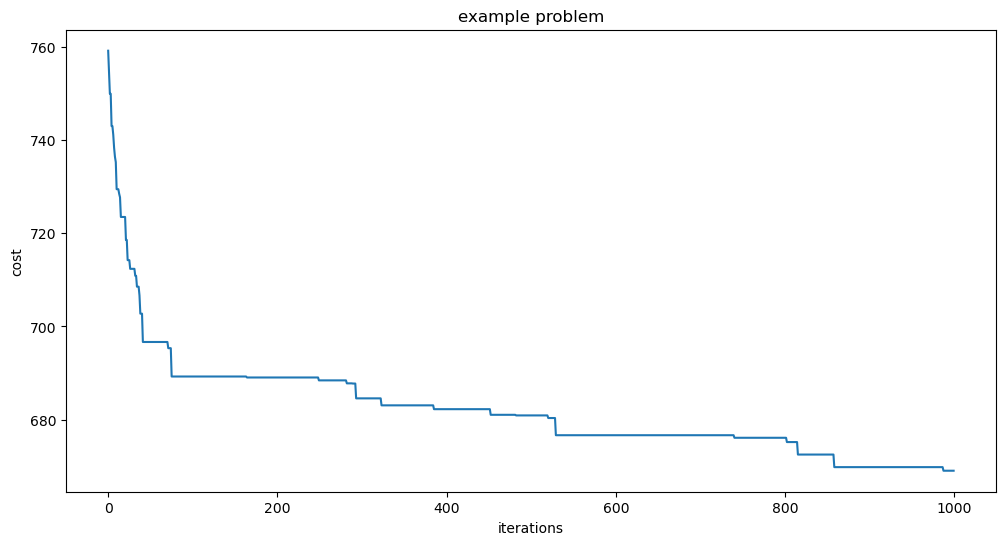

In [9]:
solver = BeesSolver(settings=problem, **SOLVER_SETTINGS)

data = list(itertools.islice(results(solver), ITERATIONS))
plt.plot(data)

plt.title("example problem")
plt.xlabel('iterations')
plt.ylabel('cost')
plt.show()

[658.3, 666.13, 661.95, 662.89]

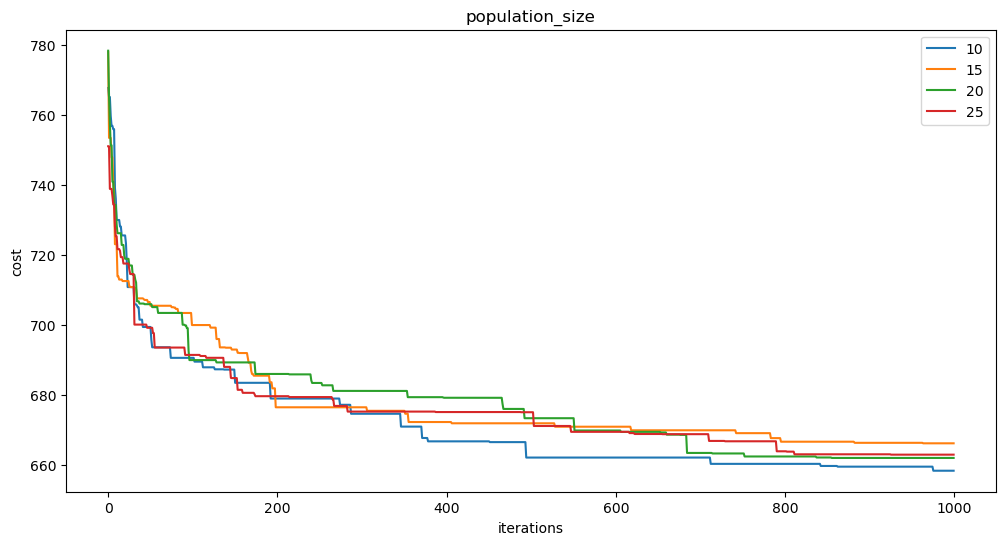

In [14]:
plot_parameter_impact('population_size', [10, 15, 20, 25], problem)

[716.94, 661.45, 659.02, 661.72, 661.69]

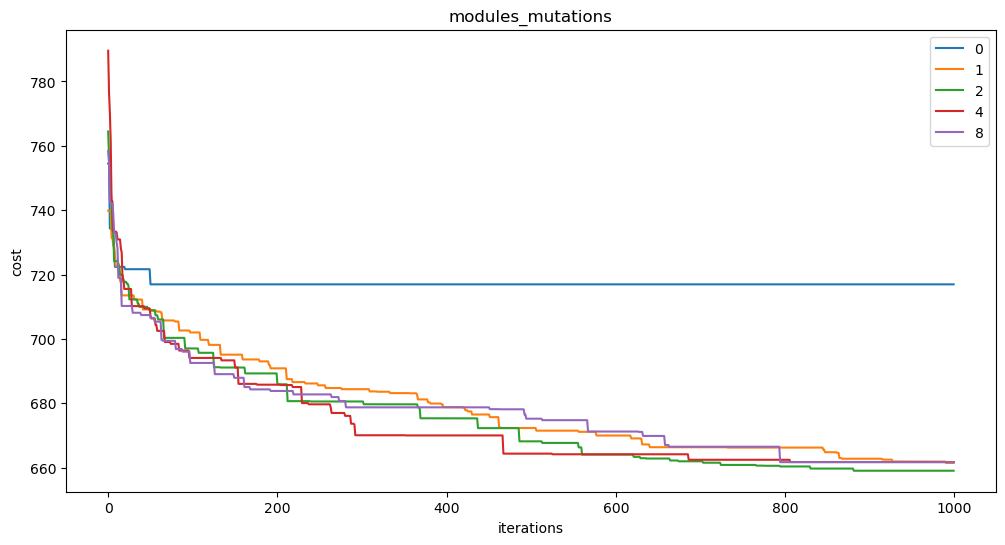

In [16]:
plot_parameter_impact('modules_mutations', [0, 1, 2, 4, 8], problem)

[670.1199999999999, 662.46, 676.4300000000001, 692.9599999999999, 711.36]

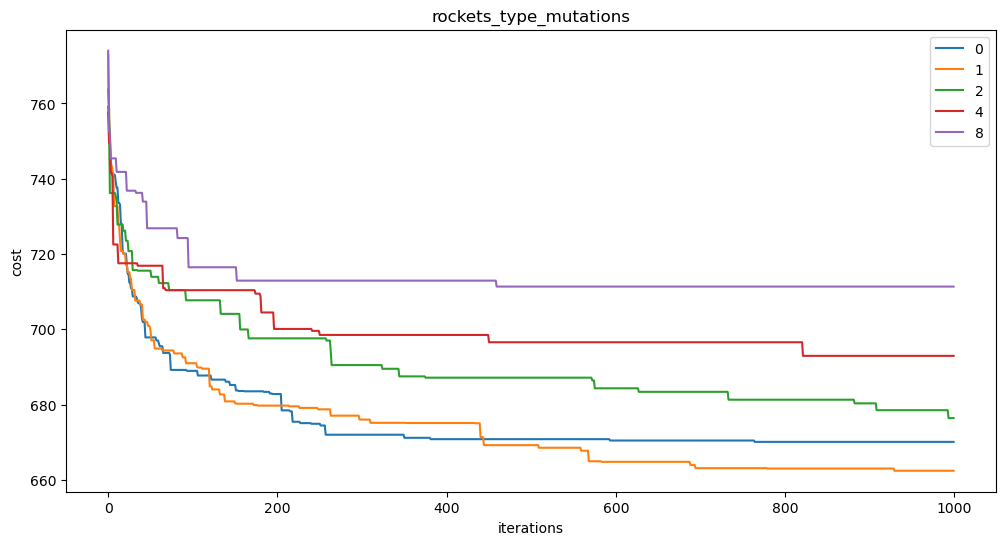

In [18]:
plot_parameter_impact('rockets_type_mutations', [0, 1, 2, 4, 8], problem)

[655.19, 657.14, 664.6800000000001, 669.23, 659.6299999999999]

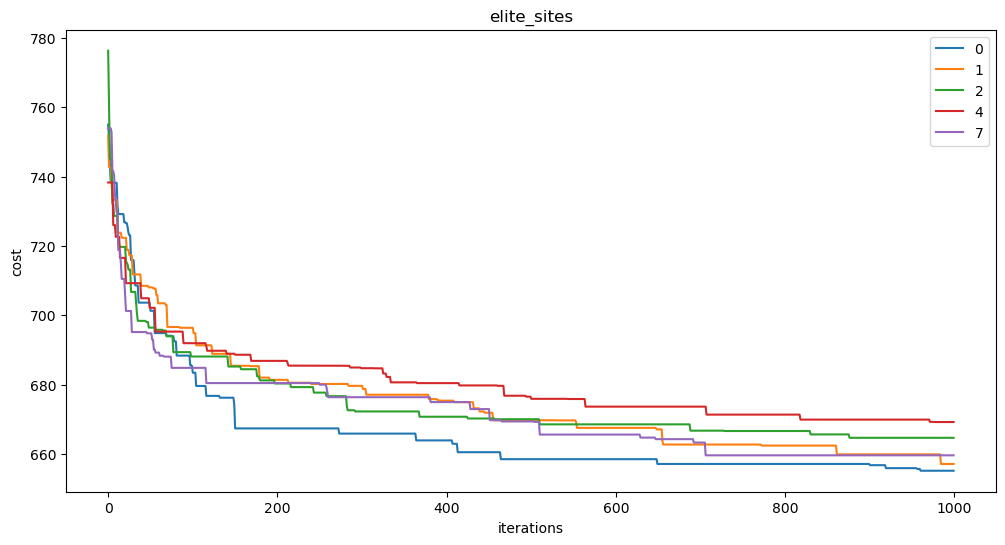

In [19]:
plot_parameter_impact('elite_sites', [0, 1, 2, 4, 7], problem)

[667.77, 667.57, 669.97, 658.72, 657.9300000000001]

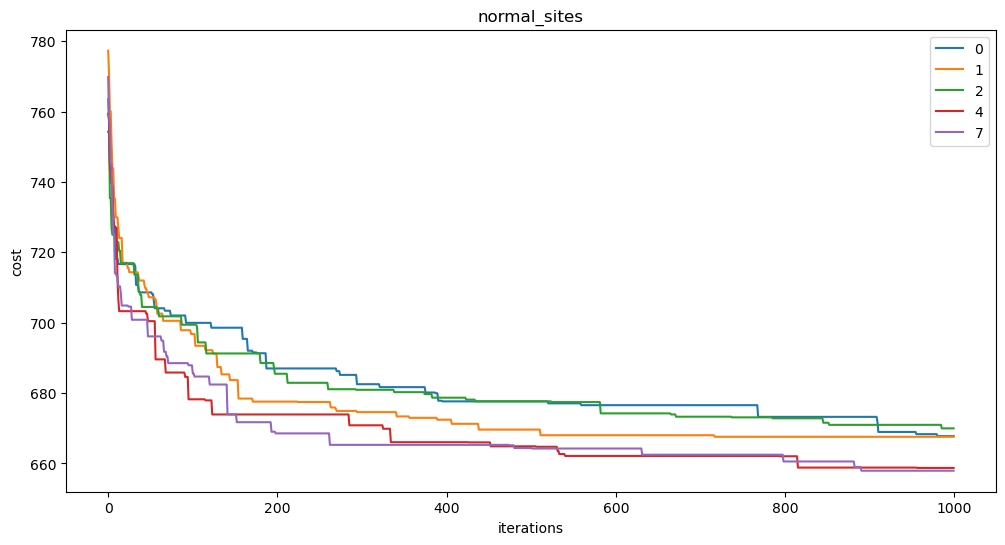

In [20]:
plot_parameter_impact('normal_sites', [0, 1, 2, 4, 7], problem)

[665.39, 653.77, 648.6500000000001, 652.92, 653.35]

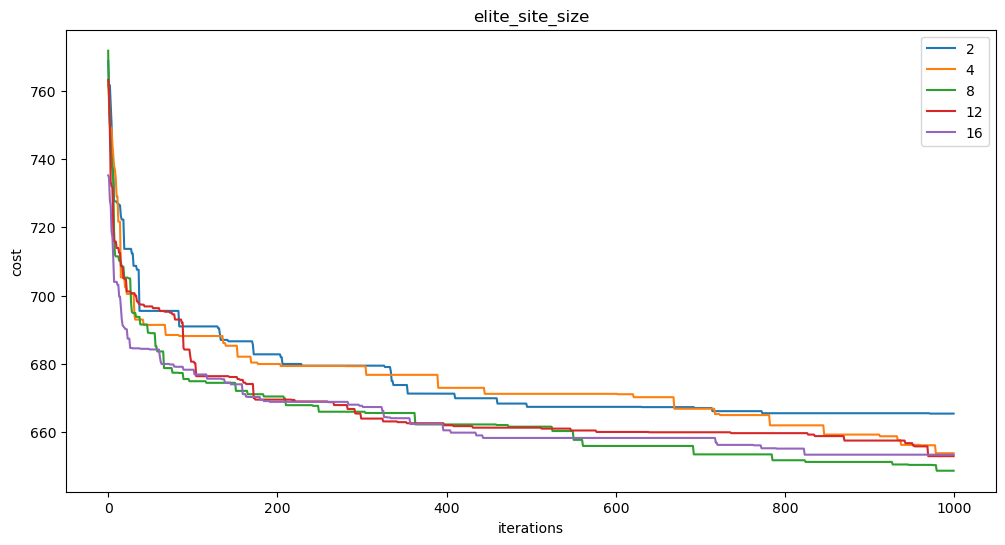

In [21]:
plot_parameter_impact('elite_site_size', [2, 4, 8, 12, 16], problem)

[670.46, 661.74, 661.72, 658.13, 658.9000000000001]

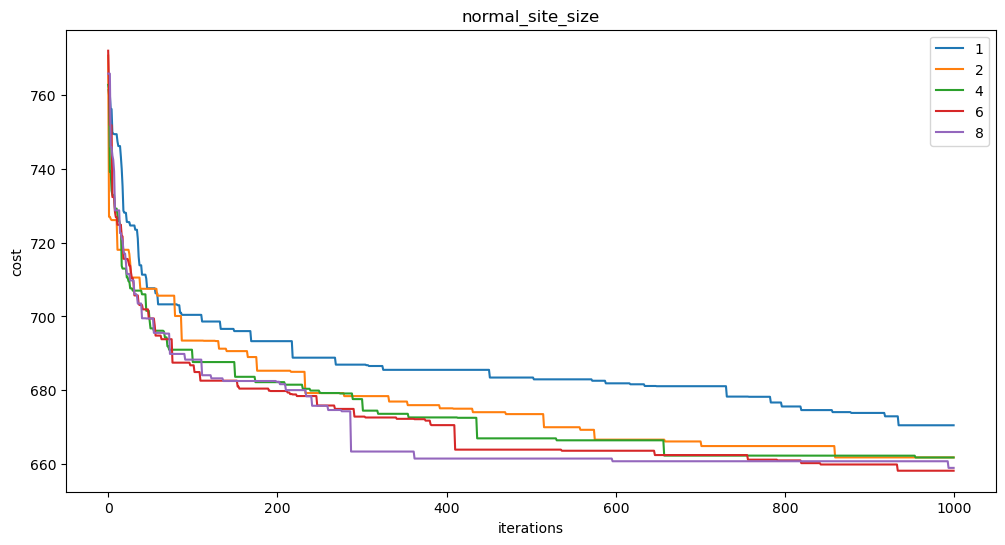

In [22]:
plot_parameter_impact('normal_site_size', [1, 2, 4, 6, 8], problem)